<div class="alert alert-block alert-info">
<center>ESTATÍSTICA  APLICADA  </center>
<center>PROJETO II</center>
<center>ALUNO: IVYSSON FERNANDES DE QUEIROZ UCHÔA</center>
</div>

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### TAREFA 1

a)

In [247]:
df_police = pd.read_csv("police.csv")
df_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

* Por meio das informações dadas pelo método info() foram feitos 91741 registros policiais catalogados em 15 variáveis disponívieis

b)
* Usando o método isna() junto com o sum() é possível verificar o número de dados faltosos em cada variável

In [248]:
df_police.isna().sum()  

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

c)

In [249]:
# Para excluir a coluna "state":
df_police.drop(columns=["state"],inplace=True)

# Para excluir a coluna "county_name":
df_police.drop(columns=["county_name"],inplace=True)

df_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           91741 non-null  object
 1   stop_time           91741 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86539 non-null  object
 4   violation_raw       86539 non-null  object
 5   violation           86539 non-null  object
 6   search_conducted    91741 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86539 non-null  object
 9   is_arrested         86539 non-null  object
 10  stop_duration       86539 non-null  object
 11  drugs_related_stop  91741 non-null  bool  
 12  district            91741 non-null  object
dtypes: bool(2), object(11)
memory usage: 7.9+ MB


d)
* Usando o método drop() é possível excluir as linhas do Data Frame onde a coluna "driver_gender" tem dados faltosos

In [250]:
linhas_vazias = df_police[df_police["driver_gender"].isna()].index
df_police.drop(linhas_vazias,inplace=True)
df_police

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


e)
* Pela descrição do conjunto de dados, as variáveis "search_conducted", "is_arrested" e "district" devem ser modificadas respectivamente para os tipos booleano, booleano e category.

In [251]:
# Usar o método astype() para converter os tipos de dados das variáveis:
df_police[["search_conducted", "is_arrested"]] = df_police[["search_conducted", "is_arrested"]].astype("bool")
df_police["district"] = df_police["district"].astype("category")

df_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   stop_date           86536 non-null  object  
 1   stop_time           86536 non-null  object  
 2   driver_gender       86536 non-null  object  
 3   driver_race         86536 non-null  object  
 4   violation_raw       86536 non-null  object  
 5   violation           86536 non-null  object  
 6   search_conducted    86536 non-null  bool    
 7   search_type         3307 non-null   object  
 8   stop_outcome        86536 non-null  object  
 9   is_arrested         86536 non-null  bool    
 10  stop_duration       86536 non-null  object  
 11  drugs_related_stop  86536 non-null  bool    
 12  district            86536 non-null  category
dtypes: bool(3), category(1), object(9)
memory usage: 6.9+ MB


f)

In [252]:
# Combinar as colunas stop_date e stop_time usando o método apply():
df_police["stop_datetime"] = df_police[["stop_date", "stop_time"]].apply(' '.join, axis=1)

In [253]:
# Converter para DateTime
df_police["stop_datetime"] = pd.to_datetime(df_police["stop_datetime"])

In [254]:
#Para verificar o tipo da coluna "stop_datetime"
df_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           86536 non-null  object        
 1   stop_time           86536 non-null  object        
 2   driver_gender       86536 non-null  object        
 3   driver_race         86536 non-null  object        
 4   violation_raw       86536 non-null  object        
 5   violation           86536 non-null  object        
 6   search_conducted    86536 non-null  bool          
 7   search_type         3307 non-null   object        
 8   stop_outcome        86536 non-null  object        
 9   is_arrested         86536 non-null  bool          
 10  stop_duration       86536 non-null  object        
 11  drugs_related_stop  86536 non-null  bool          
 12  district            86536 non-null  category      
 13  stop_datetime       86536 non-null  datetime64

g)
* Usando o método set_index() é possível definir uma coluna como índice

In [255]:
df_police.set_index("stop_datetime",inplace=True)
df_police

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3


### Tarefa 2

a)

In [256]:
#cria o Data Frame da distribuição de frequência da variável "violation"
freq_violation = pd.DataFrame()

In [257]:
freq_violation["freq_Abs"] = df_police["violation"].value_counts()
freq_violation["freq_Rel(%)"] = df_police["violation"].value_counts(normalize=True)*100

In [258]:
freq_violation

,freq_Abs,freq_Rel(%)
Speeding,48423,55.957058
Moving violation,16224,18.748267
Equipment,10921,12.620181
Other,4409,5.094989
Registration/plates,3703,4.279144
Seat belt,2856,3.300361


* Através da análise da tabela de frequências de violações é possível identificar que a violação mais comum é a excesso de velocidade ("Speeding") e a menos comum é a falta de cinto de segurança ("Seat belt")

b)    
* Para criar a tabela de contigência usa-se o método crosstab()

In [259]:
# Tabela cruzada com a frequência absoluta
tab_cruz_abs = pd.crosstab(df_police["driver_gender"], df_police["violation"])

tab_cruz_abs

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,2501,3286,707,1056,578,15646
M,8420,12938,3702,2647,2278,32777


In [260]:
#Tabela cruzada com a frequência relativa em porcentagem
tab_cruz_rel = pd.crosstab(df_police["driver_gender"], df_police["violation"], normalize=True)*100

tab_cruz_rel

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,2.890127,3.797264,0.817001,1.220301,0.66793,18.080337
M,9.730055,14.951003,4.277988,3.058843,2.63243,37.876722


c)

<AxesSubplot:xlabel='driver_gender'>

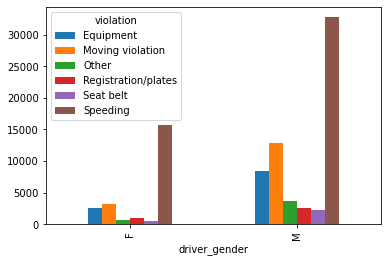

In [261]:
#Tabela para as frequências absolutas
tab_cruz_abs.plot.bar()

<AxesSubplot:xlabel='driver_gender'>

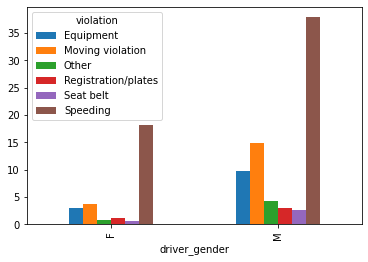

In [262]:
#Tabela para as frequências relativas
tab_cruz_rel.plot.bar()

d)

In [263]:
pd.crosstab(df_police["driver_gender"], df_police["stop_outcome"],normalize=True)*100

stop_outcome,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning
driver_gender,,,,,,
F,0.642507,0.130581,24.557410,0.194139,0.232273,1.716049
M,2.518027,0.265785,64.528058,0.507303,0.488814,4.219053


* Pela análise da tabela cruzada dos dados de gênero e dos resultados de parada é possível notar que o gênero masculino foi o mais recebeu "citation" e "warning" se comparado com o gênerno feminino. 

e)

In [264]:
#Filtrar do DF principal os casos onde houve revista do veículo
casos_de_revista = df_police.loc[df_police["search_conducted"]==True]

#Exibir em porcentagem as paradas que resultaram em revistas dos veículos
casos_de_revista["stop_outcome"].value_counts(normalize=True)*100

Citation            59.721802
Arrest Driver       30.269126
Arrest Passenger     4.172966
Warning              3.054128
No Action            2.146961
N/D                  0.635017
Name: stop_outcome, dtype: float64

f)

In [265]:
#Agrupar os casos em que houve revista pelo gênero do motorista
taxa_de_pesquisa = casos_de_revista.groupby(["driver_gender"]).count()

In [266]:
#Realizar o cálculo da porcentagem de revistas para cada gênero 
taxa_de_pesquisa = (taxa_de_pesquisa["search_conducted"]/taxa_de_pesquisa["search_conducted"].sum())*100
taxa_de_pesquisa

driver_gender
F    13.788933
M    86.211067
Name: search_conducted, dtype: float64

* Ou seja, dos casos em que houve revista de veículo, aproximadamente 14% foram realizados em motoristas mulheres e 86% em motoristas homens. 

g)
* Usando de um DataFrame que contém apenas casos onde houve revista do veículo é possível verificar a relação entre diferentes tipos de infração e o gênero do motorista

In [267]:
taxa_de_infracao = pd.crosstab(casos_de_revista["driver_gender"], casos_de_revista["violation"],normalize=True)*100
taxa_de_infracao

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,3.023889,3.900816,0.876928,1.753855,0.302389,3.931055
M,18.203810,24.070154,5.170850,8.708800,2.419111,27.638343


* Através da análise da tabela, é possível notar que homens são revistados com maior frequência que as mulheres para os mesmo tipos de infração

### Tarefa 3)

a)

In [268]:
# Taxa de Prisão
taxa_de_prisao = df_police["is_arrested"].mean()*100
print("A taxa de prisões é de {:.2f}%".format(taxa_de_prisao))

A taxa de prisões é de 3.56%


b)
* Para agrupar por hora do dia a partir do Data Frame principal usa-se os métodos lambda(), para percorrer isolar apenas os dados das horas do index, e groupby(), para agrupar pela hora do dia

In [269]:
df_horario = df_police.groupby(by=[df_police.index.map(lambda x: (x.hour))])

In [270]:
#criar a variável hourly_arrest_rate
hourly_arrest_rate = df_horario["is_arrested"].mean()*100

In [271]:
#Exibir apenas a taxa de prisão por hora do dia em porcentagem 
hourly_arrest_rate

stop_datetime
0     5.143094
1     6.493185
2     6.079821
3     6.054872
4     4.800000
5     4.278075
6     1.381304
7     1.303155
8     2.185350
9     2.520616
10    2.821272
11    2.889667
12    3.739931
13    3.077599
14    3.060458
15    3.067871
16    3.528084
17    4.061896
18    3.820439
19    3.224490
20    3.810734
21    6.454062
22    4.866608
23    4.759152
Name: is_arrested, dtype: float64

* Os valores de 0 a 23 são os horários do dia, enquanto os números ao lado são as respectivas taxas de prisão

c)

Text(0, 0.5, 'Taxa de Prisões(%)')

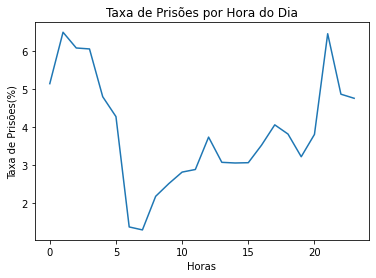

In [272]:
#criar gráfico com método plot()
hourly_arrest_rate.plot()

#Adcionar Título
plt.title("Taxa de Prisões por Hora do Dia")

#Adcionar rótulos aos eixos x e y respectivamente
plt.xlabel("Horas")
plt.ylabel("Taxa de Prisões(%)")

d)
* Para agrupar por anos a partir do Data Frame principal usa-se os métodos lambda(), para percorrer isolar apenas os dados dos anos do index, e groupby(), para agrupar esses dados.

In [273]:
df_ano = df_police.groupby(by=[df_police.index.map(lambda x: (x.year))])

In [274]:
#Exibir a taxa de drogas encontradas durante uma parada de veículo em porcentagem
annual_drug_rate = df_ano["drugs_related_stop"].mean()*100
annual_drug_rate

stop_datetime
2005    0.650142
2006    0.725790
2007    0.796989
2008    0.750514
2009    0.988858
2010    1.008121
2011    0.973141
2012    0.992102
2013    1.309351
2014    1.382648
2015    1.226614
Name: drugs_related_stop, dtype: float64

Text(0, 0.5, 'Taxa de drogas(%)')

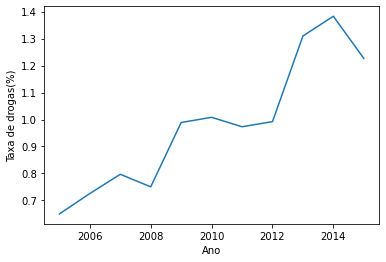

In [275]:
#Visualizar o aumento da taxa anual de drogas em gráfico em porcentagem
annual_drug_rate.plot()

plt.xlabel("Ano")
plt.ylabel("Taxa de drogas(%)")

e)

In [276]:
#Calcular a taxa anual de revistas do veículo
annual_search_rate = df_ano["search_conducted"].mean()*100
annual_search_rate

stop_datetime
2005    4.916701
2006    4.175780
2007    4.405579
2008    4.030989
2009    4.986072
2010    4.480538
2011    3.568185
2012    3.361587
2013    3.002248
2014    3.180090
2015    2.849709
Name: search_conducted, dtype: float64

In [277]:
#Criar Data Frame para conter ambas as taxas anuais
relacao_taxa_revista_drogas = pd.DataFrame()

In [278]:
#Concatenação das taxas de revista anuais e das taxas de drogas anuais
relacao_taxa_revista_drogas["annual_search_rate(%)"] = annual_search_rate
relacao_taxa_revista_drogas["annual_drug_rate(%)"] = annual_drug_rate

In [279]:
relacao_taxa_revista_drogas

,annual_search_rate(%),annual_drug_rate(%)
stop_datetime,,
2005,4.916701,0.650142
2006,4.175780,0.725790
2007,4.405579,0.796989
2008,4.030989,0.750514
2009,4.986072,0.988858
2010,4.480538,1.008121
2011,3.568185,0.973141
2012,3.361587,0.992102
2013,3.002248,1.309351


<AxesSubplot:xlabel='stop_datetime'>

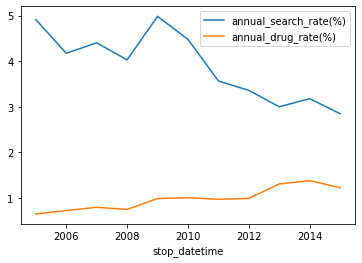

In [280]:
#Gráfico de linhas mostrando a relação entre ambas as taxas anuais
relacao_taxa_revista_drogas.plot()

* Analisando o gráfico é possível ver que mesmo com a diminuição das abordagens a taxa de apreensão de drogas cresceu a cada ano

f)

In [281]:
#Criar uma distribuição conjunta entre as variáveis district e violation através do método crosstab()
infracao_por_distrito = pd.crosstab(df_police["district"], df_police["violation"])
infracao_por_distrito

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [282]:
#Filtrar os dados para obter informações dos distritos das Zonas K1 a K3
infracoes_zonasK = infracao_por_distrito.loc['Zone K1':'Zone K3']
infracoes_zonasK

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


<AxesSubplot:xlabel='district'>

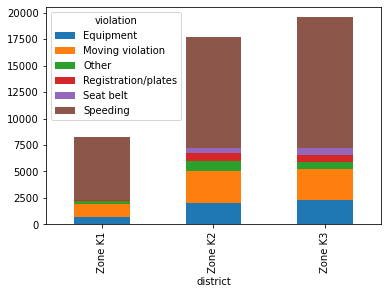

In [283]:
infracoes_zonasK.plot.bar(stacked=True)

* Através da análise do gráfico de infrações por distrito é possível percerber como o distrito da zona K3 se destaca por registrar uma quantidade bem maior de diferentes tipos de infrações quando comparada com os outros distritos, havendo apenas dois casos, o de "Registration/plates" e de "Moving violation", onde a zona K2 registrou mais casos. 

### Tarefa 4

a)

In [284]:
#Carregar o Data Frame
df_weather = pd.read_csv("weather.csv")
df_weather

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
#Isolar os dados das variáveis "TAVG", "TMIN", "TMAX"
dados_temperaturas = df_weather[["TAVG", "TMIN", "TMAX"]]

In [286]:
#Uso do método describe para visualizar as principais medidas resumo das variáveis
dados_temperaturas.describe()

,TAVG,TMIN,TMAX
count,1217.000000,4017.000000,4017.000000
mean,52.493016,43.484441,61.268608
std,17.830714,17.020298,18.199517
min,6.000000,-5.000000,15.000000
25%,39.000000,30.000000,47.000000
50%,54.000000,44.000000,62.000000
75%,68.000000,58.000000,77.000000
max,86.000000,77.000000,102.000000


<AxesSubplot:>

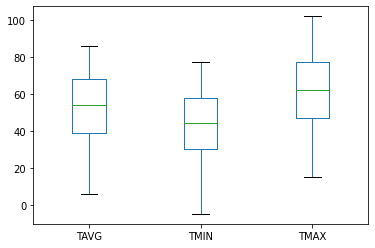

In [287]:
#Criação do gráfico boxplot das variáveis "TAVG", "TMIN", "TMAX"
dados_temperaturas.plot.box()

* Através da visualização do gráfico boxplot é possível perceber que os valores das três variávies são distribuídas de forma equilibrada, com TAVG e TMIN apresentendo pouca concentração dos valores na parte de cima da caixa. Também é notável como os gráficos das três variáveis são parecidos em formato, com os intervalos interquantis similares.

b)

In [288]:
#Criar a variável "TDIFF"
df_weather["TDIFF"] = df_weather["TMAX"] - df_weather["TMIN"]

In [289]:
#Medidas resumo da variável TDIFF
df_weather["TDIFF"].describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

Text(0.5, 1.0, 'Histograma da variável TDIFF')

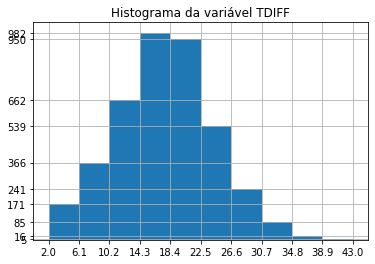

In [290]:
#Plotar histograma da variável TDIFF
t, classes, x = plt.hist(df_weather["TDIFF"])
plt.xticks(classes)
plt.yticks(t)
plt.grid()
plt.title("Histograma da variável TDIFF")

* Através da análise do histograma é possível notar que entre os anos de 2005 e 2015 as variações mais comuns de temperatura estavam entre 14.3 e 18.4 graus Fahrenheit

c)

In [291]:
#Resetar index para tornar a variável "stop_datetime" em coluna novamente
df_police.reset_index(inplace=True)

In [321]:
#Filtrar as colunas Date de df_weather
df_W = pd.DataFrame()
df_W["stop_date"] = df_weather["DATE"]
df_W

,stop_date
0,2005-01-01
1,2005-01-02
2,2005-01-03
3,2005-01-04
4,2005-01-05
...,...
4012,2015-12-27
4013,2015-12-28
4014,2015-12-29
4015,2015-12-30


* Apenas a coluna "DATE" de df_weather foi filtrada para df_W, uma vez que a coluna "rating" que foi pedida não existe

d)

In [322]:
df_PW = df_police
df_PW = pd.merge(df_PW, df_W, how="outer", on="stop_date")
df_PW

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86794,NaT,2011-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86795,NaT,2012-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86796,NaT,2013-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86797,NaT,2014-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


e)

In [332]:
# Q1) Quantas variáveis tem o novo data frame?
print("Há {} colunas no novo data frame".format(len(df_PW.columns)))

Há 14 colunas no novo data frame


In [342]:
#Q2) Qual a frequência absoluta e relativa de cada resultado de parada
freq_stop_outcome = pd.DataFrame()

freq_stop_outcome["Freq.Abs"] = df_PW["stop_outcome"].value_counts(dropna=False)
freq_stop_outcome["Freq.Rel(%)"] = df_PW["stop_outcome"].value_counts(normalize=True, dropna=False)*100

freq_stop_outcome

,Freq.Abs,Freq.Rel(%)
Citation,77091,88.815539
Warning,5136,5.917119
Arrest Driver,2735,3.150958
No Action,624,0.718902
N/D,607,0.699317
Arrest Passenger,343,0.395166
NaN,263,0.302999
